In [11]:
!pip install rdkit-pypi
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from rdkit import DataStructs
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from numpy import linalg as LA

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Suzuki_Project/Suzuki_classification.csv')
df.head()

,Unnamed: 0,Reactant_1,Reactant_2,Ligand,Reagent,Solvent,Success
0,0,C1=CC2=C(C=CC(=C2)Cl)N=C1,B(C1=C(C=CC2=C1C=NN2C3CCCCO3)C)(O)O,CC(C)(C)P(C(C)(C)C)C(C)(C)C,[OH-].[Na+],CC#N,0.0
1,1,C1=CC2=C(C=CC(=C2)Cl)N=C1,B(C1=C(C=CC2=C1C=NN2C3CCCCO3)C)(O)O,C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3,[OH-].[Na+],CC#N,0.0
2,2,C1=CC2=C(C=CC(=C2)Cl)N=C1,B(C1=C(C=CC2=C1C=NN2C3CCCCO3)C)(O)O,CC(C)(C)P(C(C)(C)C)C1=CC=C(N(C)C)C=C1,[OH-].[Na+],CC#N,0.0
3,3,C1=CC2=C(C=CC(=C2)Cl)N=C1,B(C1=C(C=CC2=C1C=NN2C3CCCCO3)C)(O)O,C1CCC(CC1)P(C2CCCCC2)C3CCCCC3,[OH-].[Na+],CC#N,0.0
4,4,C1=CC2=C(C=CC(=C2)Cl)N=C1,B(C1=C(C=CC2=C1C=NN2C3CCCCO3)C)(O)O,CC1=CC=CC=C1P(C2=CC=CC=C2C)C3=CC=CC=C3C,[OH-].[Na+],CC#N,0.0


In [ ]:
features = ['Reactant_1','Reactant_2','Ligand','Reagent','Solvent']
for i in features:
  smileslist = df[i]
  # converts smiles to mol
  molobj = [Chem.MolFromSmiles(smi) if smi != '0' else '0' for smi in smileslist ]
  # converts mol to fingerprints
  fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512) if mol !='0' else np.zeros(512) for mol in molobj]
  df[i] = fps

In [ ]:
df.head()

,Unnamed: 0,Reactant_1,Reactant_2,Ligand,Reagent,Solvent,Success
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0


In [ ]:
concatenated = [np.concatenate(((df['Reactant_1'][i],df['Reactant_2'][i],df['Ligand'][i],df['Reagent'][i],df['Solvent'][i])),axis=None) for i in range(len(df['Reactant_1']))]
concatenated = np.array(concatenated)
concatenated.shape

X =concatenated
y = np.array(df[['Success']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(random_state = 0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
Logistic_score = np.mean(scores)
print('Logistic Regression CV score: ' + str(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Logistic_score_test = accuracy_score(y_test, y_pred)
print('Logisitic regression test score: ' + str(Logistic_score_test))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_score = np.mean(scores)
print('knn CV score: ' + str(np.mean(scores)))

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score_test = accuracy_score(y_test, y_pred)
print('KNN test score: ' + str(knn_score_test))

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_score = np.mean(scores)
print('Random Forest CV score: ' + str(np.mean(scores)))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_score_test = accuracy_score(y_test, y_pred)
print('Random Forest test score: ' + str(rf_score_test))

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X_train, y_train, cv=5)
gbc_score = np.mean(scores)
print('Gradient Boosting Classifier CV score: ' + str(np.mean(scores)))

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_score_test = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier test score: ' + str(gbc_score_test))

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5)
nb_score = np.mean(scores)
print('Gaussian NB CV score: ' + str(np.mean(scores)))

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

gnb_score_test = accuracy_score(y_test, y_pred)
print('Gaussian NB test score: ' + str(gnb_score_test))

from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X_train, y_train, cv=5)
svc_score = np.mean(scores)
print('Support vector classifier CV score: ' + str(np.mean(scores)))

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_score_test = accuracy_score(y_test, y_pred)
print('Support vector classifier test score: ' + str(svc_score_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression CV score: 0.8001274197385186


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logisitic regression test score: 0.8133680555555556


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

knn CV score: 0.8476573374691755


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN test score: 0.8723958333333334


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest CV score: 0.8556845454695334


<ipython-input-7-492fc2bb253f>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Random Forest test score: 0.8784722222222222


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Gradient Boosting Classifier CV score: 0.8630640560929482


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier test score: 0.8836805555555556


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Gaussian NB CV score: 0.7647548995362486
Gaussian NB test score: 0.7638888888888888


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Support vector classifier CV score: 0.8491741269628175


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support vector classifier test score: 0.8671875


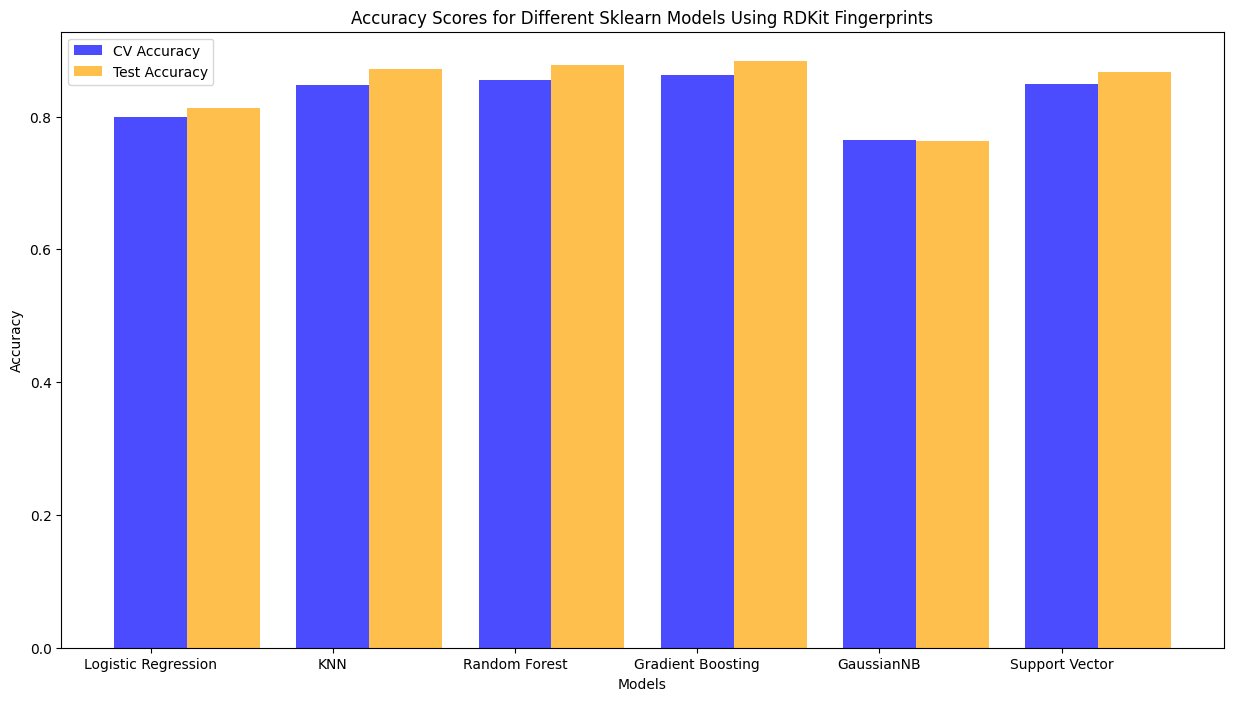

In [ ]:
models = ['Logistic Regression','KNN','Random Forest','Gradient Boosting','GaussianNB','Support Vector']
CV_scores = [Logistic_score,knn_score,rf_score,gbc_score,nb_score,svc_score]
test_scores = [Logistic_score_test,knn_score_test,rf_score_test,gbc_score_test,gnb_score_test,svc_score_test]

plt.figure(figsize=(15,8))
plt.bar(models, CV_scores, color='blue', alpha=0.7, label='CV Accuracy', width=0.4)
plt.bar(np.arange(len(models)) + 0.4, test_scores, color='orange', alpha=0.7, label='Test Accuracy', width=0.4)
plt.title('Accuracy Scores for Different Sklearn Models Using RDKit Fingerprints')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

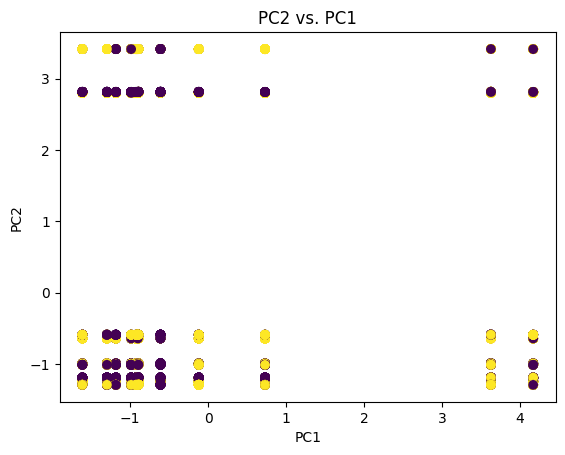

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Project data onto two principal components
pca_df = pca.fit_transform(X)

plt.scatter(pca_df[:,0], pca_df[:,1],c=df['Success'])
plt.title('PC2 vs. PC1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# DL
from keras import models
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import metrics


model = Sequential()
#First layer input dimension must match the number of descriptors you are using.
#Activation functions are set in each layer
#First number is the number of neurons in that layer
model.add(Dense(400, input_dim = 2560, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#Compile your model
model.compile(loss='binary_crossentropy',#The loss function you will optimize against
              optimizer = optimizers.Adam(learning_rate=0.01),#The optimizer you will use
              metrics=['accuracy'] #The performance metrics you want to store during training
              )

history = model.fit(X_train,
          y_train, #The x and y training data to fit to
          batch_size = 16, #Neural network batch size
          epochs = 100, #Number of epochs to train for
          verbose = 1 #Don't print anything to screen while training
          )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               1024400   
                                                                 
 dense_5 (Dense)             (None, 200)               80200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1124801 (4.29 MB)
Trainable params: 1124801 (4.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
288/288 [==============================] - 10s 22ms/step - loss: 0.4662 - accuracy: 0.7789
Epoch 2/100
288/288 [========================

In [14]:
y_pred_test = model.predict(X_test, verbose = 0)
y_pred_train = model.predict(X_train, verbose = 0)

# Calculate accuracy
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(y_test,y_pred_test)
test_score = metric.result().numpy()

metric.update_state(y_train,y_pred_train)
train_score = metric.result().numpy()

print('train accuracy: ' + str(train_score))
print('test accuracy: ' + str(test_score))

train accuracy: 0.93350697
test accuracy: 0.8967014


In [ ]:
concatenated = [np.sum([df['Reactant_1'][i],df['Reactant_2'][i],df['Ligand'][i],df['Reagent'][i],df['Solvent'][i]],axis=0) for i in range(len(df['Reactant_1']))]
concatenated = np.array(concatenated)
concatenated.shape



In [ ]:
X =concatenated
y = np.array(df[['Success']].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(random_state = 0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
Logistic_score = np.mean(scores)
print('Logistic Regression CV score: ' + str(np.mean(scores)))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Logistic_score_test = accuracy_score(y_test, y_pred)
print('Logisitic regression test score: ' + str(Logistic_score_test))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_score = np.mean(scores)
print('knn CV score: ' + str(np.mean(scores)))

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score_test = accuracy_score(y_test, y_pred)
print('KNN test score: ' + str(knn_score_test))

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_score = np.mean(scores)
print('Random Forest CV score: ' + str(np.mean(scores)))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_score_test = accuracy_score(y_test, y_pred)
print('Random Forest test score: ' + str(rf_score_test))

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X_train, y_train, cv=5)
gbc_score = np.mean(scores)
print('Gradient Boosting Classifier CV score: ' + str(np.mean(scores)))

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

gbc_score_test = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier test score: ' + str(gbc_score_test))

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5)
nb_score = np.mean(scores)
print('Gaussian NB CV score: ' + str(np.mean(scores)))

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

gnb_score_test = accuracy_score(y_test, y_pred)
print('Gaussian NB test score: ' + str(gnb_score_test))

from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X_train, y_train, cv=5)
svc_score = np.mean(scores)
print('Support vector classifier CV score: ' + str(np.mean(scores)))

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_score_test = accuracy_score(y_test, y_pred)
print('Support vector classifier test score: ' + str(svc_score_test))

In [ ]:
models = ['Logistic Regression','KNN','Random Forest','Gradient Boosting','GaussianNB','Support Vector']
CV_scores = [Logistic_score,knn_score,rf_score,gbc_score,nb_score,svc_score]
test_scores = [Logistic_score_test,knn_score_test,rf_score_test,gbc_score_test,gnb_score_test,svc_score_test]

plt.figure(figsize=(15,8))
plt.bar(models, CV_scores, color='blue', alpha=0.7, label='CV Accuracy', width=0.4)
plt.bar(np.arange(len(models)) + 0.4, test_scores, color='orange', alpha=0.7, label='Test Accuracy', width=0.4)
plt.title('Accuracy Scores for Different Sklearn Models Using RDKit Fingerprints')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# DL
from keras import models
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import metrics


model = Sequential()
#First layer input dimension must match the number of descriptors you are using.
#Activation functions are set in each layer
#First number is the number of neurons in that layer
model.add(Dense(400, input_dim = 512, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#Compile your model
model.compile(loss='binary_crossentropy',#The loss function you will optimize against
              optimizer = optimizers.Adam(learning_rate=0.01),#The optimizer you will use
              metrics=['accuracy'] #The performance metrics you want to store during training
              )

history = model.fit(X_train,
          y_train, #The x and y training data to fit to
          batch_size = 16, #Neural network batch size
          epochs = 100, #Number of epochs to train for
          verbose = 1 #Don't print anything to screen while training
          )

In [ ]:
y_pred_test = model.predict(X_test, verbose = 0)
y_pred_train = model.predict(X_train, verbose = 0)

# Calculate accuracy
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(y_test,y_pred_test)
test_score = metric.result().numpy()

metric.update_state(y_train,y_pred_train)
train_score = metric.result().numpy()

print('train accuracy: ' + str(train_score))
print('test accuracy: ' + str(test_score))

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

(tn, fp, fn, tp)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

xlabels =['Predicted Success', 'Predicted Fail']
ylabels =['Actual Success', 'Actual Fail']
array = [[575,97],[57,423]]
ax = sn.heatmap(data = array,xticklabels=xlabels,yticklabels=ylabels,fmt='g', annot=True)
plt.title('NN using RDKit fingerprint')
plt.show()

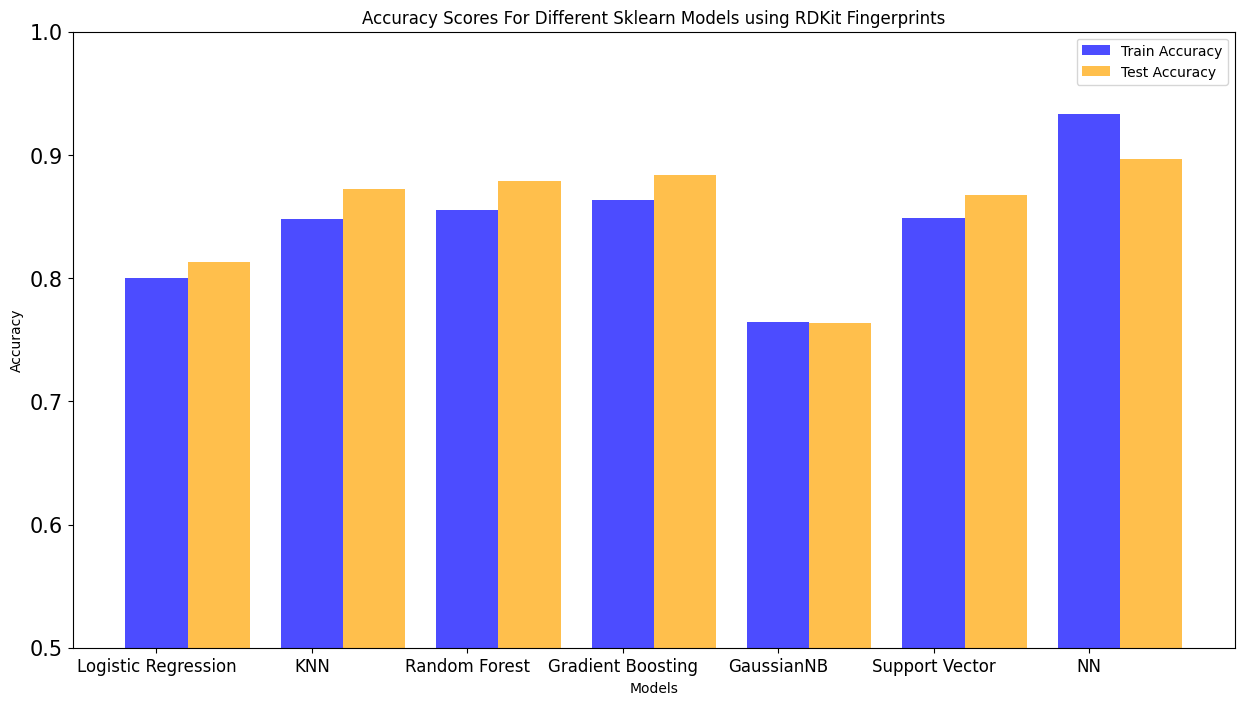

In [16]:
models = ['Logistic Regression','KNN','Random Forest','Gradient Boosting','GaussianNB','Support Vector', 'NN']
CV_scores = [Logistic_score,knn_score,rf_score,gbc_score,nb_score,svc_score,train_score]
test_scores = [Logistic_score_test,knn_score_test,rf_score_test,gbc_score_test,gnb_score_test,svc_score_test, test_score]

plt.figure(figsize=(15,8))
plt.bar(models, CV_scores, color='blue', alpha=0.7, label='Train Accuracy', width=0.4)
plt.bar(np.arange(len(models)) + 0.4, test_scores, color='orange', alpha=0.7, label='Test Accuracy', width=0.4)
plt.title('Accuracy Scores For Different Sklearn Models using RDKit Fingerprints')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.ylim(0.5, 1)
plt.legend()
plt.show()